# MSA 2024 Phase 2 - Part 2

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

## 1. Load and split preprocessed data

### W store

In [85]:
# load the preprocessed data
w_df = pd.read_csv('G:/job application/MSA/2024-Phase-2/data-science/1. Analysis and Preprocessing/w_store_dataset.csv', index_col=0, encoding='utf-8')
w_df

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Size,Year,Month,Day,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C,Weekly_Sales
0,2010-02-05,1.0,42.31,2.572,4740.545,364.57,36.26,1176.0925,2726.2075,211.096358,...,151315.0,2010.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,1643690.90
1,2010-02-12,1.0,38.51,2.548,4740.545,364.57,36.26,1176.0925,2726.2075,211.242170,...,151315.0,2010.0,2.0,12.0,0.0,1.0,1.0,0.0,0.0,1641957.44
2,2010-02-19,1.0,39.93,2.514,4740.545,364.57,36.26,1176.0925,2726.2075,211.289143,...,151315.0,2010.0,2.0,19.0,1.0,0.0,1.0,0.0,0.0,1611968.17
3,2010-02-26,1.0,46.63,2.561,4740.545,364.57,36.26,1176.0925,2726.2075,211.319643,...,151315.0,2010.0,2.0,26.0,1.0,0.0,1.0,0.0,0.0,1409727.59
4,2010-03-05,1.0,46.50,2.625,4740.545,364.57,36.26,1176.0925,2726.2075,211.350143,...,151315.0,2010.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,2013-06-28,45.0,76.05,3.639,4842.290,975.03,3.00,2449.9700,3169.6900,182.764003,...,118221.0,2013.0,6.0,28.0,1.0,0.0,0.0,1.0,0.0,960746.04
8186,2013-07-05,45.0,77.50,3.614,9090.480,2268.58,36.26,5797.4700,1514.9300,182.764003,...,118221.0,2013.0,7.0,5.0,1.0,0.0,0.0,1.0,0.0,960746.04
8187,2013-07-12,45.0,79.37,3.614,3789.940,1827.31,85.72,744.8400,2150.3600,182.764003,...,118221.0,2013.0,7.0,12.0,1.0,0.0,0.0,1.0,0.0,960746.04
8188,2013-07-19,45.0,82.84,3.737,2961.490,1047.07,204.19,363.0000,1059.4600,182.764003,...,118221.0,2013.0,7.0,19.0,1.0,0.0,0.0,1.0,0.0,960746.04


In [65]:
print(w_df.columns)
print(w_df.dtypes)

Index(['Date', 'Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size',
       'Year', 'Month', 'Day', 'IsHoliday_False', 'IsHoliday_True', 'Type_A',
       'Type_B', 'Type_C', 'Weekly_Sales'],
      dtype='object')
Date                object
Store              float64
Temperature        float64
Fuel_Price         float64
MarkDown1          float64
MarkDown2          float64
MarkDown3          float64
MarkDown4          float64
MarkDown5          float64
CPI                float64
Unemployment       float64
Size               float64
Year               float64
Month              float64
Day                float64
IsHoliday_False    float64
IsHoliday_True     float64
Type_A             float64
Type_B             float64
Type_C             float64
Weekly_Sales       float64
dtype: object


In [57]:
# only for Lasso Regression and Gradient Boosting
# split data, training set is 70% and test set is 30%
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

label01 = w_df['Weekly_Sales']
features01 = w_df.drop(columns=['Weekly_Sales', 'Date'])

# data scaling
scaler = StandardScaler()
features01 = scaler.fit_transform(features01)

X01_train, X01_test, y01_train, y01_test = train_test_split(features01, label01, test_size=0.3)

### X store

In [125]:
x_df = pd.read_csv('G:/job application/MSA/2024-Phase-2/data-science/1. Analysis and Preprocessing/x_store_dataset.csv', index_col=0, encoding='utf-8')
x_df

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Order Year,Order Month,Order Day,Ship Year,...,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Profit
0,2016-11-08,2016-11-11,42420.0,261.9600,2.0,0.00,2016.0,11.0,8.0,2016.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,41.9136
1,2016-11-08,2016-11-11,42420.0,731.9400,3.0,0.00,2016.0,11.0,8.0,2016.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,219.5820
2,2015-10-11,2015-10-18,33311.0,957.5775,5.0,0.45,2015.0,10.0,11.0,2015.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-383.0310
3,2014-06-09,2014-06-14,90032.0,48.8600,7.0,0.00,2014.0,6.0,9.0,2014.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,14.1694
4,2014-06-09,2014-06-14,90032.0,182.2200,9.0,0.20,2014.0,6.0,9.0,2014.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,2015-03-19,2015-03-22,77041.0,383.4656,4.0,0.32,2015.0,3.0,19.0,2015.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-67.6704
2117,2016-12-05,2016-12-10,19711.0,13.4000,1.0,0.00,2016.0,12.0,5.0,2016.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.4320
2118,2015-09-06,2015-09-09,70506.0,85.9800,1.0,0.00,2015.0,9.0,6.0,2015.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,22.3548
2119,2014-01-21,2014-01-23,33180.0,25.2480,3.0,0.20,2014.0,1.0,21.0,2014.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.1028


In [6]:
print(x_df.columns)
print(x_df.dtypes)

Index(['Order Date', 'Ship Date', 'Postal Code', 'Sales', 'Quantity',
       'Discount', 'Order Year', 'Order Month', 'Order Day', 'Ship Year',
       ...
       'Region_Central', 'Region_East', 'Region_South', 'Region_West',
       'Category_Furniture', 'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Furnishings', 'Sub-Category_Tables', 'Profit'],
      dtype='object', length=449)
Order Date                   object
Ship Date                    object
Postal Code                 float64
Sales                       float64
Quantity                    float64
                             ...   
Sub-Category_Bookcases      float64
Sub-Category_Chairs         float64
Sub-Category_Furnishings    float64
Sub-Category_Tables         float64
Profit                      float64
Length: 449, dtype: object


In [59]:
# only for Lasso Regression and Gradient Boosting
# split data, training set is 70% and test set is 30%
from sklearn.model_selection import train_test_split

label02 = x_df['Profit']
features02 = x_df.drop(columns=['Profit', 'Order Date', 'Ship Date'])

# data scaling
scaler = StandardScaler()
features02 = scaler.fit_transform(features02)

X02_train, X02_test, y02_train, y02_test = train_test_split(features02, label02, test_size=0.3)

## 2. Choose an algorithm

<h3> Lasso Regression </h3>
<ol>
    <li>Use case: Regressioin problems with many features, especially when some are irrelevant.</li>
    <li>Benifits:
        <ol>
            <li>Performs feature selection by shrinking coefficients of less important features to zero.</li>
            <li>Helps to prevent overfitting.</li>
            <li>Can handle high-dimensional datasets.</li>
        </ol>
    </li>
    <li>Conditions:
        <ol>
            <li>Can be unstable when features are highly correlated.</li>
            <li>May require feature scaling.</li>
            <li>Tuning the regularisation parameter is crucial for good performance.</li>
        </ol>
    </li>
</ol>

<h3> Gradient Boosting </h3>
<ol>
    <li>Use case: Regressioin and classification tasks with complex data patterns and interactions.</li>
    <li>Benifits:
        <ol>
            <li>High predictive accuracy by sequentially improving weak models.</li>
            <li>Flexible and can handle a variety of loss function.</li>
            <li>Incorporates regularisation to reduce overfitting.</li>
        </ol>
    </li>
    <li>Conditions:
        <ol>
            <li>Prone to overfitting if not properly tuned.</li>
            <li>Computationally intensive and slower to train.</li>
            <li>Requires careful tuning of parameters such as learning rate and number of trees.</li>
        </ol>
    </li>
</ol>

## 3. Train and test a model

### W store

<h5> Lasso regression

In [96]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [128]:
# train the model
model_lr_01 = Lasso(alpha=1.0)
model_lr_01.fit(X01_train, y01_train)

# predict on the train set
predictions_train = model_lr_01.predict(X01_train)

# predict on the test set
predictions_test = model_lr_01.predict(X01_test)

In [130]:
## calculate errors on the train set
mae_train = mean_absolute_error(y01_train, predictions_train)
mse_train = mean_squared_error(y01_train, predictions_train)
r2_train = r2_score(y01_train, predictions_train)

# calculate errors on the test set
mae_test = mean_absolute_error(y01_test, predictions_test)
mse_test = mean_squared_error(y01_test, predictions_test)
r2_test = r2_score(y01_test, predictions_test)

# print errors
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train R²: {r2_train}')
print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test R²: {r2_test}')

Train MAE: 251026.4239924856
Train MSE: 106324866034.49849
Train R²: 0.5870720262439839
Test MAE: 258909.94707323494
Test MSE: 110663739281.61345
Test R²: 0.5338032387536698


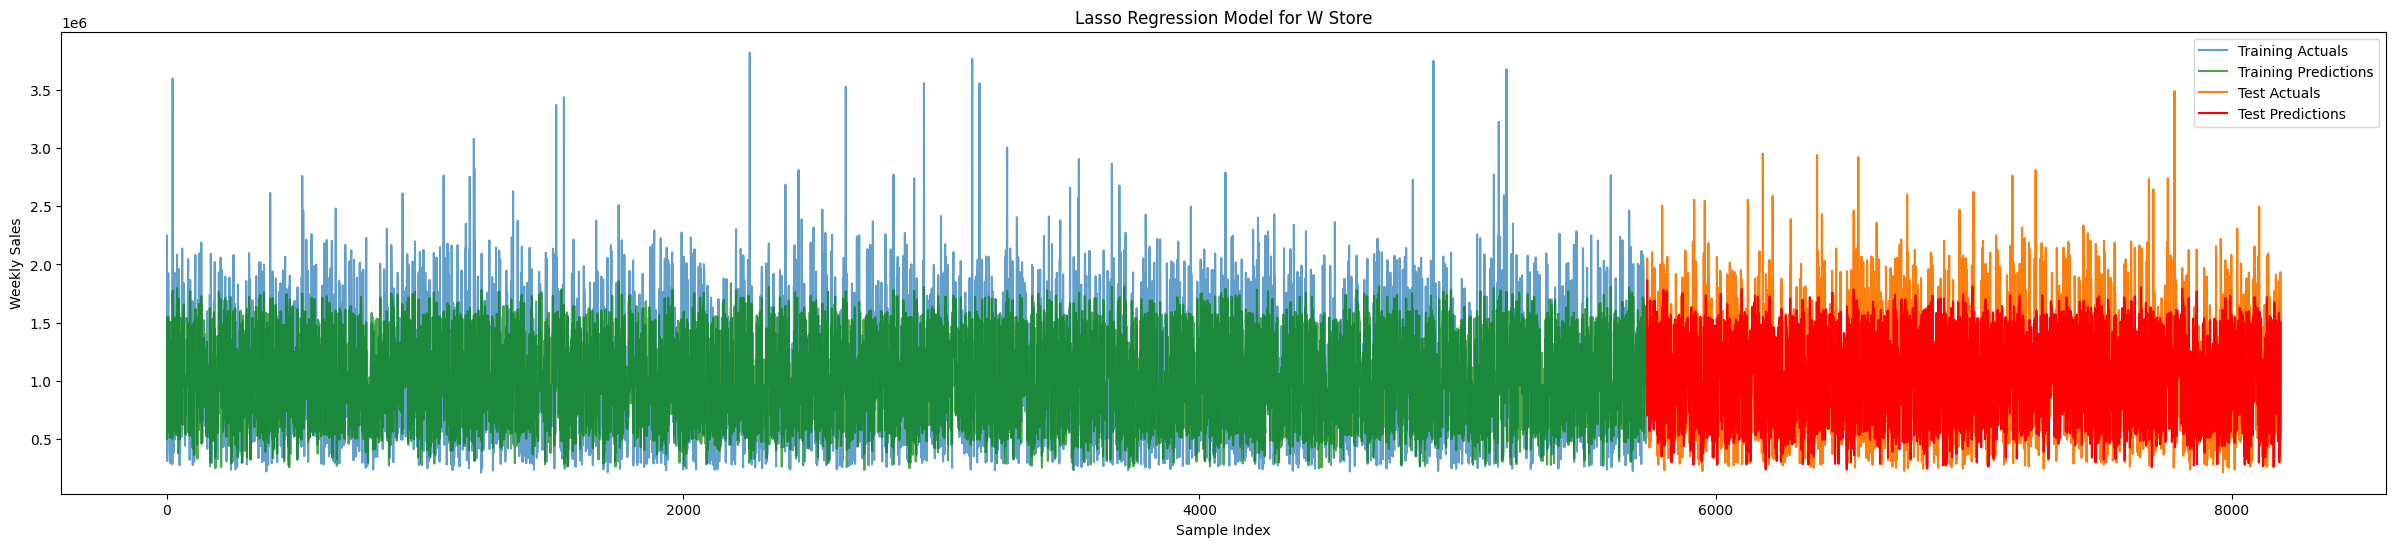

In [131]:
# plot the results
plt.figure(figsize=(30,6))
plt.plot(y01_train.values, label='Training Actuals', alpha=0.7)
plt.plot(predictions_train, label='Training Predictions', color='green', alpha=0.7)
plt.plot(np.arange(len(y01_train), len(y01_train) + len(y01_test)), y01_test.values, label='Test Actuals')
plt.plot(np.arange(len(y01_train), len(y01_train) + len(y01_test)), predictions_test, label='Test Predictions', color='red')
plt.legend()
plt.title('Lasso Regression Model for W Store')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.show()

<h5> Gradient Boosting

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

In [132]:
# define and train the Gradient Boosting model
model_gb_01 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb_01.fit(X01_train, y01_train)

# predict on the training set
predictions_train = model_gb_01.predict(X01_train)

# predict on the test set
predictions_test = model_gb_01.predict(X01_test)


In [133]:
# calculate errors on the training set
mae_train = mean_absolute_error(y01_train, predictions_train)
mse_train = mean_squared_error(y01_train, predictions_train)
r2_train = r2_score(y01_train, predictions_train)

# calculate errors on the test set
mae_test = mean_absolute_error(y01_test, predictions_test)
mse_test = mean_squared_error(y01_test, predictions_test)
r2_test = r2_score(y01_test, predictions_test)

# print errors
print(f'Training MAE: {mae_train}')
print(f'Training MSE: {mse_train}')
print(f'Training R²: {r2_train}')
print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test R²: {r2_test}')

Training MAE: 98923.47614085859
Training MSE: 20056038879.010742
Training R²: 0.9221094763176595
Test MAE: 106237.87262880799
Test MSE: 23480434682.860806
Test R²: 0.9010832032889345


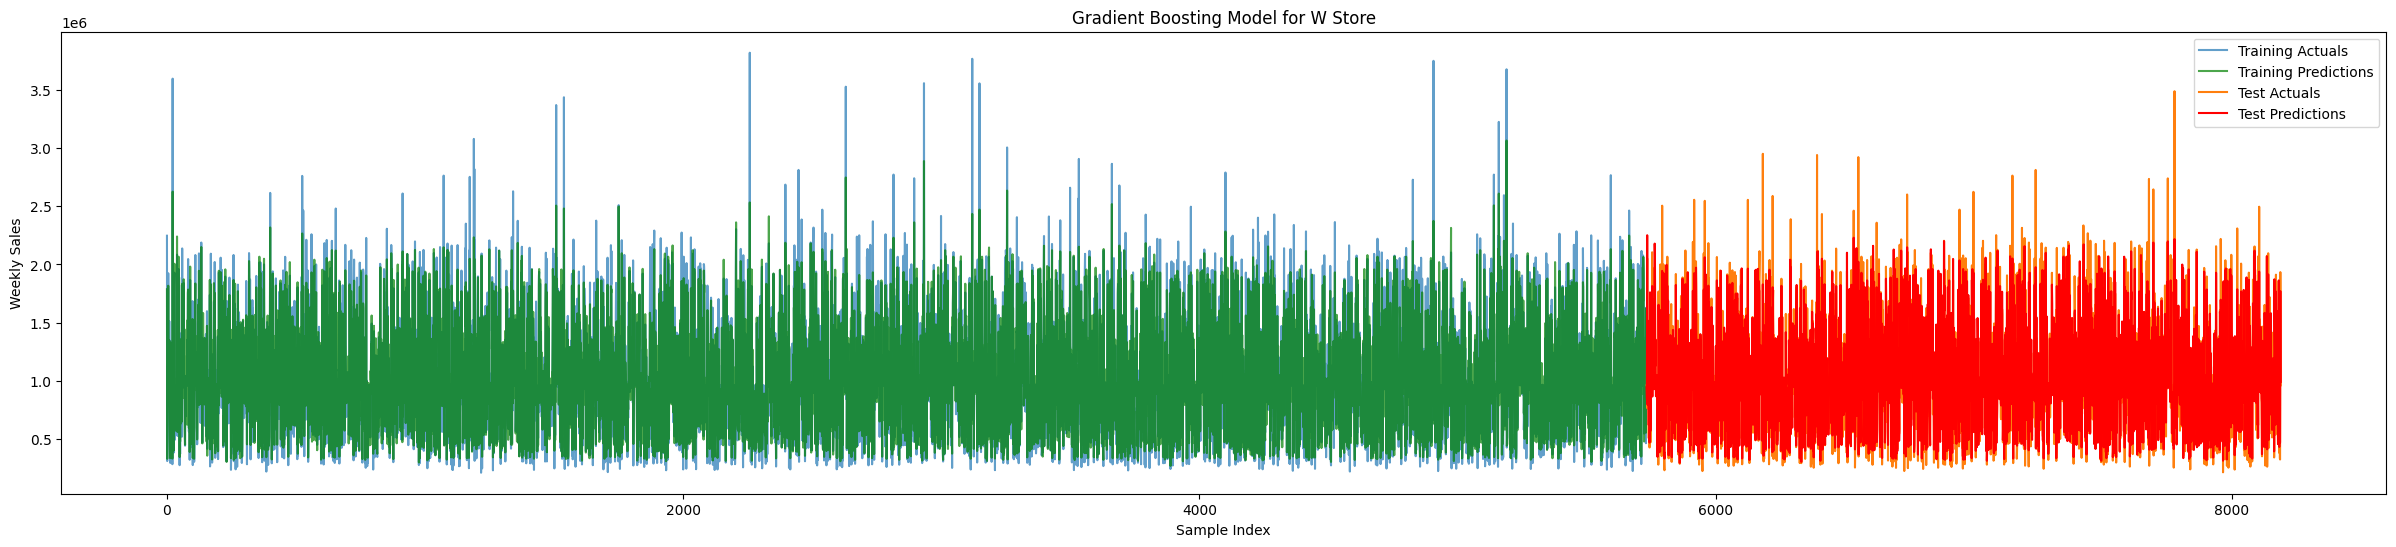

In [135]:
# plot the results
plt.figure(figsize=(30,6))
plt.plot(y01_train.values, label='Training Actuals', alpha=0.7)
plt.plot(predictions_train, label='Training Predictions', color='green', alpha=0.7)
plt.plot(np.arange(len(y01_train), len(y01_train) + len(y01_test)), y01_test.values, label='Test Actuals')
plt.plot(np.arange(len(y01_train), len(y01_train) + len(y01_test)), predictions_test, label='Test Predictions', color='red')
plt.legend()
plt.title('Gradient Boosting Model for W Store')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.show()

### X store

<h5> Lasso regression

In [136]:
# train the model
model_lr_02 = Lasso(alpha=1.0)
model_lr_02.fit(X02_train, y02_train)

# predict on the train set
predictions_train = model_lr_02.predict(X02_train)

# predict on the test set
predictions_test = model_lr_02.predict(X02_test)

In [137]:
## calculate errors on the train set
mae_train = mean_absolute_error(y02_train, predictions_train)
mse_train = mean_squared_error(y02_train, predictions_train)
r2_train = r2_score(y02_train, predictions_train)

# calculate errors on the test set
mae_test = mean_absolute_error(y02_test, predictions_test)
mse_test = mean_squared_error(y02_test, predictions_test)
r2_test = r2_score(y02_test, predictions_test)

# print errors
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train R²: {r2_train}')
print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test R²: {r2_test}')

Train MAE: 57.7113174273887
Train MSE: 8836.149181998368
Train R²: 0.4699868173148394
Test MAE: 71.81215207276186
Test MSE: 19168.152111901476
Test R²: 0.1575338395390301


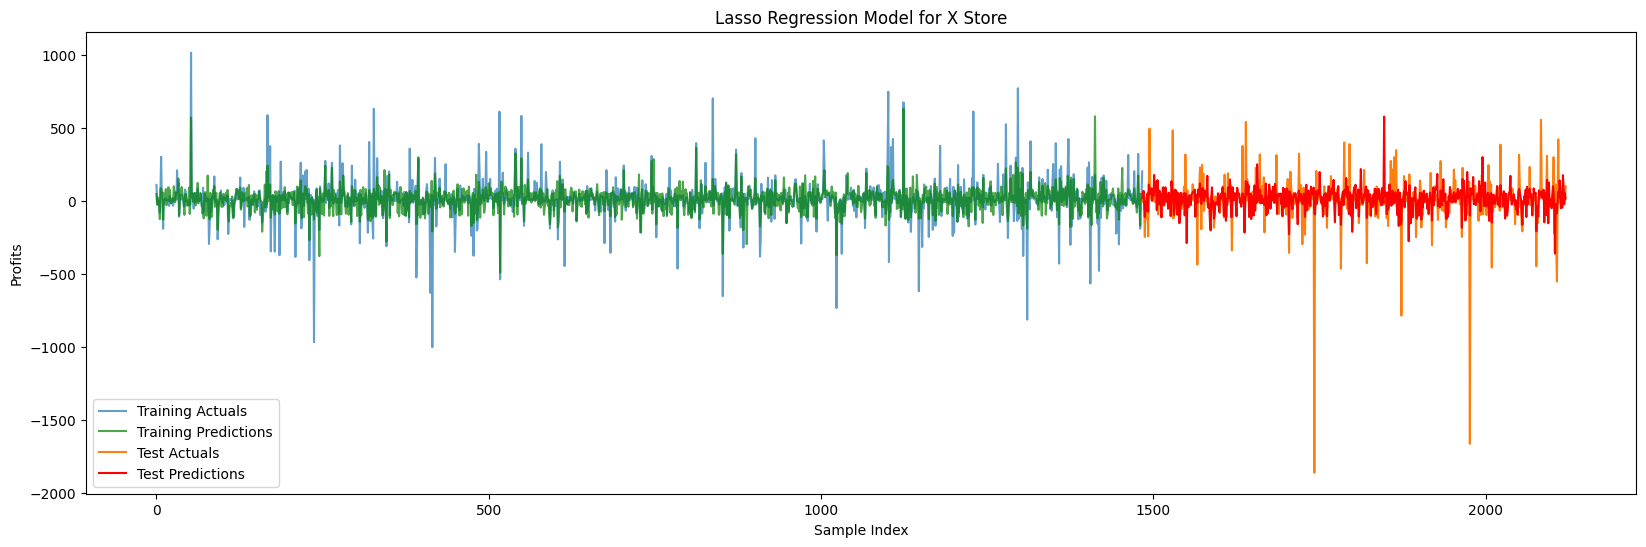

In [138]:
# plot the results
plt.figure(figsize=(20,6))
plt.plot(y02_train.values, label='Training Actuals', alpha=0.7)
plt.plot(predictions_train, label='Training Predictions', color='green', alpha=0.7)
plt.plot(np.arange(len(y02_train), len(y02_train) + len(y02_test)), y02_test.values, label='Test Actuals')
plt.plot(np.arange(len(y02_train), len(y02_train) + len(y02_test)), predictions_test, label='Test Predictions', color='red')
plt.legend()
plt.title('Lasso Regression Model for X Store')
plt.xlabel('Sample Index')
plt.ylabel('Profits')
plt.show()

<h5> Gradient Boosting

In [139]:
# define and train the Gradient Boosting model
model_gb_02 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb_02.fit(X02_train, y02_train)

# predict on the training set
predictions_train = model_gb_02.predict(X02_train)

# predict on the test set
predictions_test = model_gb_02.predict(X02_test)

In [140]:
# calculate errors on the training set
mae_train = mean_absolute_error(y02_train, predictions_train)
mse_train = mean_squared_error(y02_train, predictions_train)
r2_train = r2_score(y02_train, predictions_train)

# calculate errors on the test set
mae_test = mean_absolute_error(y02_test, predictions_test)
mse_test = mean_squared_error(y02_test, predictions_test)
r2_test = r2_score(y02_test, predictions_test)

# print errors
print(f'Training MAE: {mae_train}')
print(f'Training MSE: {mse_train}')
print(f'Training R²: {r2_train}')
print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test R²: {r2_test}')

Training MAE: 29.287644591036045
Training MSE: 2542.2997969452235
Training R²: 0.8475068291667256
Test MAE: 41.58156538391155
Test MSE: 11185.38498704162
Test R²: 0.5083872306366031


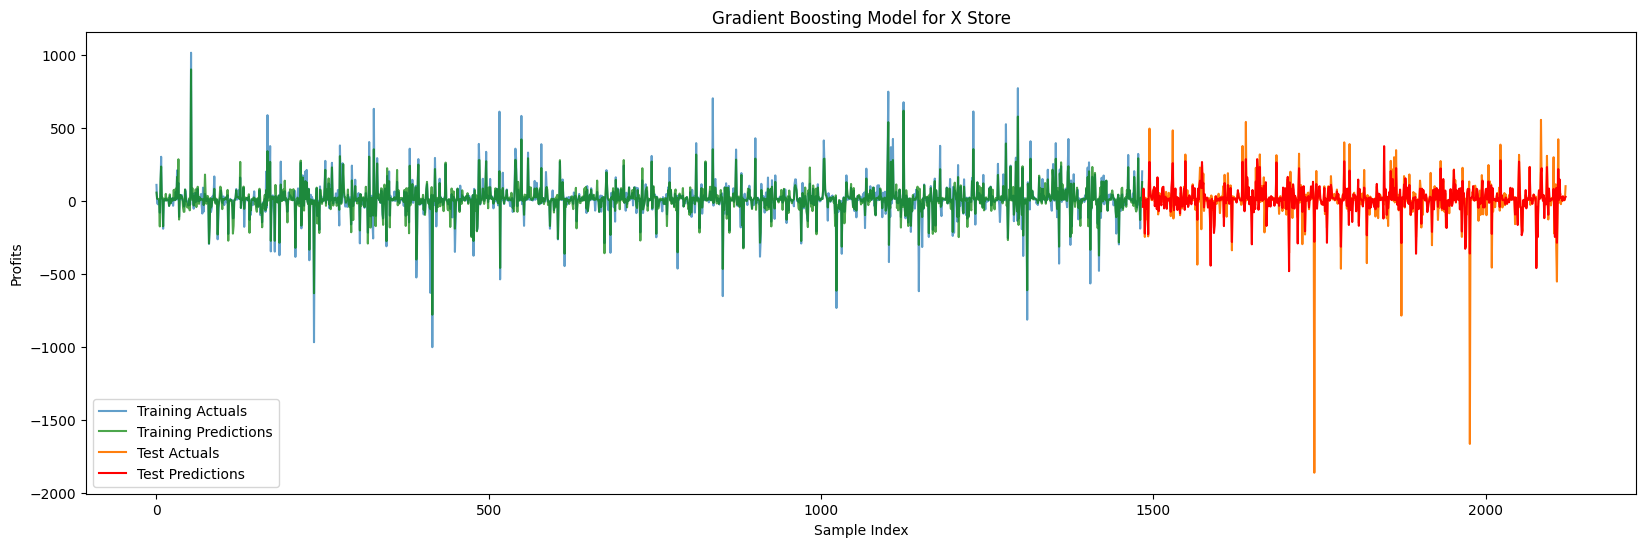

In [141]:
# plot the results
plt.figure(figsize=(20,6))
plt.plot(y02_train.values, label='Training Actuals', alpha=0.7)
plt.plot(predictions_train, label='Training Predictions', color='green', alpha=0.7)
plt.plot(np.arange(len(y02_train), len(y02_train) + len(y02_test)), y02_test.values, label='Test Actuals')
plt.plot(np.arange(len(y02_train), len(y02_train) + len(y02_test)), predictions_test, label='Test Predictions', color='red')
plt.legend()
plt.title('Gradient Boosting Model for X Store')
plt.xlabel('Sample Index')
plt.ylabel('Profits')
plt.show()

## 4. Evaluate the model 

### W store

In [142]:
# define SMAPE and MAPE functions
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

In [143]:
# predict on the test set using Lasso Regression
predictions_lr_test = model_lr_01.predict(X01_test)

# predict on the test set using Gradient Boosting
predictions_gb_test = model_gb_01.predict(X01_test)

In [145]:
# calculate errors on the test set for Lasso Regression
mae_lr_test = mean_absolute_error(y01_test, predictions_lr_test)
mse_lr_test = mean_squared_error(y01_test, predictions_lr_test)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_test = r2_score(y01_test, predictions_lr_test)
smape_lr_test = smape(y01_test, predictions_lr_test)
mape_lr_test = mape(y01_test, predictions_lr_test)

# calculate errors on the test set for Gradient Boosting
mae_gb_test = mean_absolute_error(y01_test, predictions_gb_test)
mse_gb_test = mean_squared_error(y01_test, predictions_gb_test)
rmse_gb_test = np.sqrt(mse_gb_test)
r2_gb_test = r2_score(y01_test, predictions_gb_test)
smape_gb_test = smape(y01_test, predictions_gb_test)
mape_gb_test = mape(y01_test, predictions_gb_test)

# print errors for Lasso Regression
print('Lasso Regression metrics for W store:')
print(f'MAE: {mae_lr_test}')  # Mean Absolute Error: Lower values indicate better performance.
print(f'MSE: {mse_lr_test}')  # Mean Squared Error: Lower values indicate better performance.
print(f'RMSE: {rmse_lr_test}')  # Root Mean Squared Error: Lower values indicate better performance.
print(f'R²: {r2_lr_test}')  # R² Score: Closer to 1 is better.
print(f'SMAPE: {smape_lr_test}')  # Symmetric Mean Absolute Percentage Error: Lower values indicate better performance.
print(f'MAPE: {mape_lr_test}')  # Mean Absolute Percentage Error: Lower values indicate better performance.

# print errors for Gradient Boosting
print('Gradient Boosting metrics for W store:')
print(f'MAE: {mae_gb_test}')  
print(f'MSE: {mse_gb_test}')  
print(f'RMSE: {rmse_gb_test}')  
print(f'R²: {r2_gb_test}') 
print(f'SMAPE: {smape_gb_test}') 
print(f'MAPE: {mape_gb_test}')  

Lasso Regression metrics for W store:
MAE: 258909.94707323494
MSE: 110663739281.61345
RMSE: 332661.59874805727
R²: 0.5338032387536698
SMAPE: 26.74531957270817
MAPE: 28.818865209903265
Gradient Boosting metrics for W store:
MAE: 106237.87262880799
MSE: 23480434682.860806
RMSE: 153233.26885131965
R²: 0.9010832032889345
SMAPE: 11.147560689671012
MAPE: 11.804276281592557


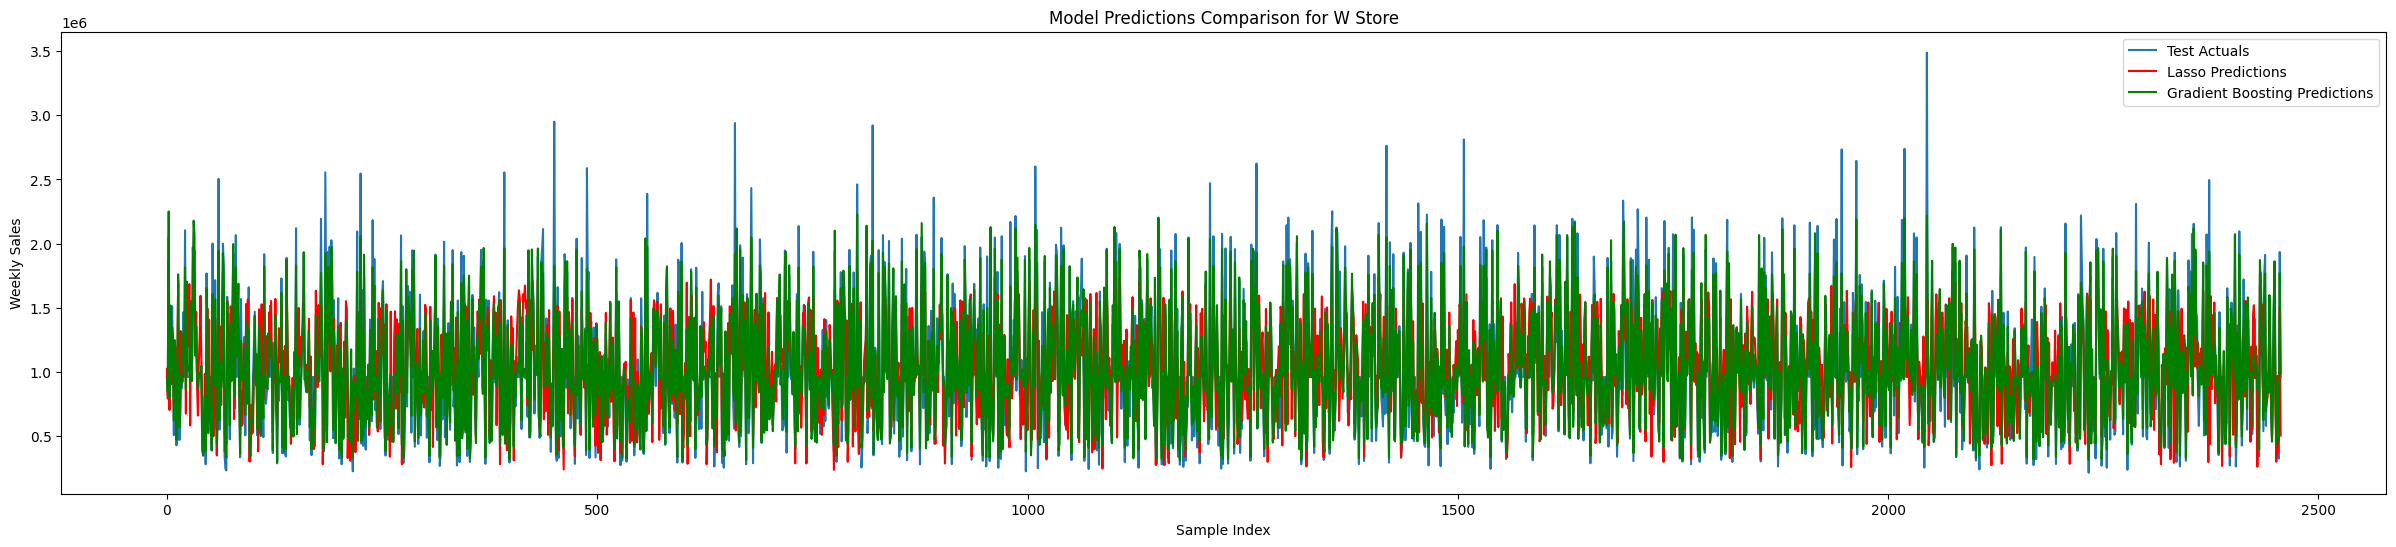

In [148]:
# plot the results
plt.figure(figsize=(30,6))
plt.plot(y01_test.values, label='Test Actuals')
plt.plot(predictions_lr_test, label='Lasso Predictions', color='red')
plt.plot(predictions_gb_test, label='Gradient Boosting Predictions', color='green')
plt.legend()
plt.title('Model Predictions Comparison for W Store')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.show()

### X store

In [149]:
# predict on the test set using Lasso Regression
predictions_lr_test = model_lr_02.predict(X02_test)

# predict on the test set using Gradient Boosting
predictions_gb_test = model_gb_02.predict(X02_test)

In [151]:
# calculate errors on the test set for Lasso Regression
mae_lr_test = mean_absolute_error(y02_test, predictions_lr_test)
mse_lr_test = mean_squared_error(y02_test, predictions_lr_test)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_test = r2_score(y02_test, predictions_lr_test)
smape_lr_test = smape(y02_test, predictions_lr_test)
mape_lr_test = mape(y02_test, predictions_lr_test)

# calculate errors on the test set for Gradient Boosting
mae_gb_test = mean_absolute_error(y02_test, predictions_gb_test)
mse_gb_test = mean_squared_error(y02_test, predictions_gb_test)
rmse_gb_test = np.sqrt(mse_gb_test)
r2_gb_test = r2_score(y02_test, predictions_gb_test)
smape_gb_test = smape(y02_test, predictions_gb_test)
mape_gb_test = mape(y02_test, predictions_gb_test)

# print errors for Lasso Regression
print('Lasso Regression metrics for X store:')
print(f'MAE: {mae_lr_test}')  # Mean Absolute Error: Lower values indicate better performance.
print(f'MSE: {mse_lr_test}')  # Mean Squared Error: Lower values indicate better performance.
print(f'RMSE: {rmse_lr_test}')  # Root Mean Squared Error: Lower values indicate better performance.
print(f'R²: {r2_lr_test}')  # R² Score: Closer to 1 is better.
print(f'SMAPE: {smape_lr_test}')  # Symmetric Mean Absolute Percentage Error: Lower values indicate better performance.
print(f'MAPE: {mape_lr_test}')  # Mean Absolute Percentage Error: Lower values indicate better performance.

# print errors for Gradient Boosting
print('Gradient Boosting metrics for X store:')
print(f'MAE: {mae_gb_test}')  
print(f'MSE: {mse_gb_test}')  
print(f'RMSE: {rmse_gb_test}')  
print(f'R²: {r2_gb_test}') 
print(f'SMAPE: {smape_gb_test}') 
print(f'MAPE: {mape_gb_test}')  

Lasso Regression metrics for X store:
MAE: 71.81215207276186
MSE: 19168.152111901476
RMSE: 138.44909574244778
R²: 0.1575338395390301
SMAPE: 122.24827226601663
MAPE: inf
Gradient Boosting metrics for X store:
MAE: 41.58156538391155
MSE: 11185.38498704162
RMSE: 105.76098045612862
R²: 0.5083872306366031
SMAPE: 82.03688927364121
MAPE: inf


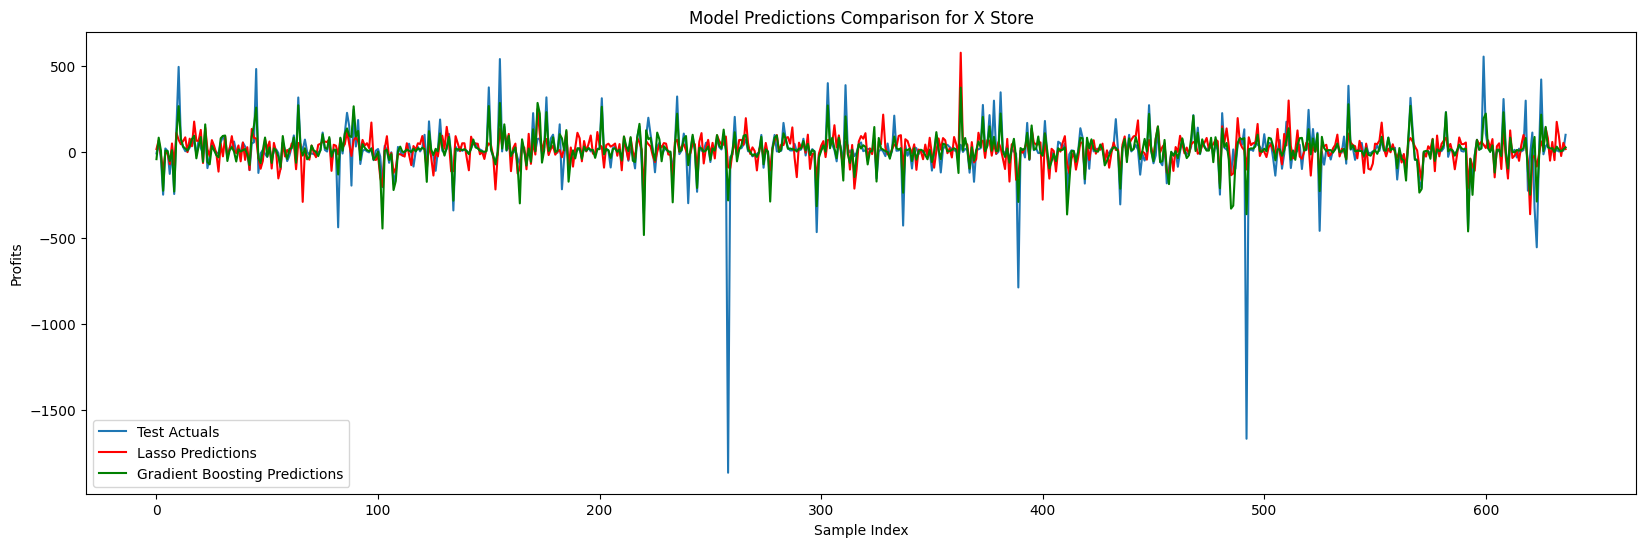

In [152]:
# plot the results
plt.figure(figsize=(20,6))
plt.plot(y02_test.values, label='Test Actuals')
plt.plot(predictions_lr_test, label='Lasso Predictions', color='red')
plt.plot(predictions_gb_test, label='Gradient Boosting Predictions', color='green')
plt.legend()
plt.title('Model Predictions Comparison for X Store')
plt.xlabel('Sample Index')
plt.ylabel('Profits')
plt.show()

## 5. Summary

<h4> What I have found during training and evaluation </h4>
<ol>
    <li>For W store and X store, Gradient Boosting always perform better than Lasso Regression.</li>
    <li>For both regression models, W store always perform better than X store. The reason for this may be W store has much more data than X store.</li>
</ol>

<h4>Training and evaluation steps</h4>
<h5> Lasso Regression </h5>
<ol>
    <li>Model initialized with alpha=1.0.</li>
    <li>Model trained on the training dataset.</li>
    <li>Predictions made on both training and test datasets.</li>
    <li>Errors calculated: MAE, MSE, and R2.</li>
    <li>Metrics printed for both training and test sets.</li>
</ol>
<h5> Gradient Boosting </h5>
<ol>
    <li>Model initialized with 100 estimators, learning rate of 0.1, and max depth of 3.</li>
    <li>Model trained on the training dataset.</li>
    <li>Predictions made on both training and test datasets.</li>
    <li>Errors calculated: MAE, MSE, and R2.</li>
    <li>Metrics printed for both training and test sets.</li>
</ol>

<h4>Next steps to improve the models</h4>
<h5>Lasso Regression </h5>
    <ol>
        <li>Hyperparameter Tuning: optimise the regularisation parameter ('alpha') using cross-validation.</li>        
        <li>Feature selection: remove irrelevant or highly correlated features to reduce overfitting.</li>        
    </ol>                    

<h5> Gradient Boosting </h5>    
    <ol>    
        <li>Hyperparameter Tuning: optimise parameters such as  'n_estimators', 'learning_rate', 'max_depth', 'and min_samples_split' using grid search.</li>
        <li>Early stopping: use early stopping to prevent overfitting by monitoring validation loss.</li>    
        <li>Boosting variants: Experiment with different boositng algorithms like XGboost for potentially better performance.</li>        
    </ol>    
